# No-Show Appointments Investigation
The idea behind this project is to investigate a dataset about no-show appointments from information received of about 100k medical appointments. The dataset can be found here: https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv&sa=D&ust=1532469042118000

This investigation attempts to find some more insights into this data and try and find a relationship between certain of the collected data with the aim to unravel which of those features will more likely lead to patients either showing up/not show up at all for their appointments.

This investigation is done by Mark Arrow for the Udacity Data Analyst Nanodegree.

## Imports for the investigation

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the data

In [25]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Data Wrangling
The goals of this section is to understand the data at hand. This involves determining and assessing the data structure, identifying potential problems with the data, and eventually cleaning up the data by
- Finding duplicates and determining their significance
- Finding and removing NaN values
- Converting columns to the appropriate types

This is to ensure the highest quality of data for the investigation.

In [26]:
# What is the shape of the data?
df.shape

(110527, 14)

In [27]:
# So we know there is 110527 different entries in this dataset.
# We have 14 different features per entry.

# Now let us determine whether we have any missing values for all of those columns
df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [28]:
# All our data seems filled in. Now let us see if there are any duplicates

amount_of_duplicates = df.duplicated().sum()
"We have {} duplicate entries".format(amount_of_duplicates)

'We have 0 duplicate entries'

### Convert Columns to the Appropriate Types

In [29]:
# Let us first determine what types we have as for our features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [30]:
# Some interesting results:

# When we get to the column names, they are inconsistently named with SMS_received having an underscore and No-show having a dash. The rest of
# the columns  all start with a capital letter.

# PatientId is a float while this should be a readable number
# ScheduledDay and AppointmentDay are strings while they should be DateTime
# No-show is of type string while it should rather be an int

# first step is to rename the columns:

df.rename(columns={"PatientId": "patient_id", "AppointmentID": "appointment_id", "ScheduledDay": "scheduled_day", "AppointmentDay": "appointment_day","No-show":"no_show"},inplace=True)
df.rename(columns= {'Hipertension': 'hypertension', 'Handcap': 'handicap'}, inplace= True)
df.rename(columns=lambda col: col.strip().lower(), inplace=True)
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [50]:
# Next step is to change the column data types
df.patient_id = df.patient_id.astype('int')
df.appointment_day = pd.to_datetime(df.appointment_day)
df.scheduled_day = pd.to_datetime(df.scheduled_day)
# remove times of scheduled day since appointment day doesn't have any
df.scheduled_day = df.scheduled_day.apply(lambda x: x.normalize())

# Confirm changes
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438,5642503,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951,5642549,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,867951213174,5642828,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8841186448183,5642494,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [32]:
# Next up is the no_show column. This needs to change to a 1 / 0 and then the column type needs to change to int as well
# we need to confirm the amount of unique values in the no_show column
df.no_show.unique()


array(['No', 'Yes'], dtype=object)

In [33]:
#now that we know it only has a yes and a no, we map it to the appropriate types
df.no_show.replace({"No": "0", "Yes": "1"}, inplace=True)
df.no_show = df.no_show.astype("int")
df.no_show.info()

<class 'pandas.core.series.Series'>
RangeIndex: 110527 entries, 0 to 110526
Series name: no_show
Non-Null Count   Dtype
--------------   -----
110527 non-null  int64
dtypes: int64(1)
memory usage: 863.6 KB


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   patient_id       110527 non-null  int64 
 1   appointment_id   110527 non-null  int64 
 2   gender           110527 non-null  object
 3   scheduled_day    110527 non-null  object
 4   appointment_day  110527 non-null  object
 5   age              110527 non-null  int64 
 6   neighbourhood    110527 non-null  object
 7   scholarship      110527 non-null  int64 
 8   hypertension     110527 non-null  int64 
 9   diabetes         110527 non-null  int64 
 10  alcoholism       110527 non-null  int64 
 11  handicap         110527 non-null  int64 
 12  sms_received     110527 non-null  int64 
 13  no_show          110527 non-null  int64 
dtypes: int64(10), object(4)
memory usage: 11.8+ MB


In [35]:
#Last column to look at is age
df.age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

In [36]:
# We need to remove anything below 0 and above 100 to keep our data consistent
df = df.query("age >= 0 and age <= 100")

In [61]:
# now that we have clean data, we can start exploring

## Data exploration and visualisation
We will now attempt to dive deeper into the data and attempt some insights into what will more likely
cause people not to show up for appointments

In [94]:
def get_males(dataframe):
    return dataframe.query("gender == 'M'")

def get_females(dataframe):
    return dataframe.query("gender == 'F'")

def get_uncompleted_appointments(dataframe):
    return dataframe.query('no_show == 1')

def get_completed_appointments(dataframe):
    return dataframe.query('no_show == 0')

amount_of_appointments = df.drop_duplicates('appointment_id').value_counts()

appointments_with_scholarship = df.query("scholarship == 1")
appointments_without_scholarship = df.query("scholarship == 0")

patients_with_scholarship = appointments_with_scholarship.drop_duplicates('patient_id')
patients_without_scholarship = appointments_without_scholarship.drop_duplicates('patient_id')

females_with_scholarship = get_females(patients_with_scholarship)
males_with_scholarship = get_males(patients_with_scholarship)

females_without_scholarship = get_females(patients_without_scholarship)
males_without_scholarship = get_males(patients_without_scholarship)

### Is there a relationship between the people with scholarships and the people without scholarships, who show up for appointments? If so, can we identify whether gender has a further impact on this?

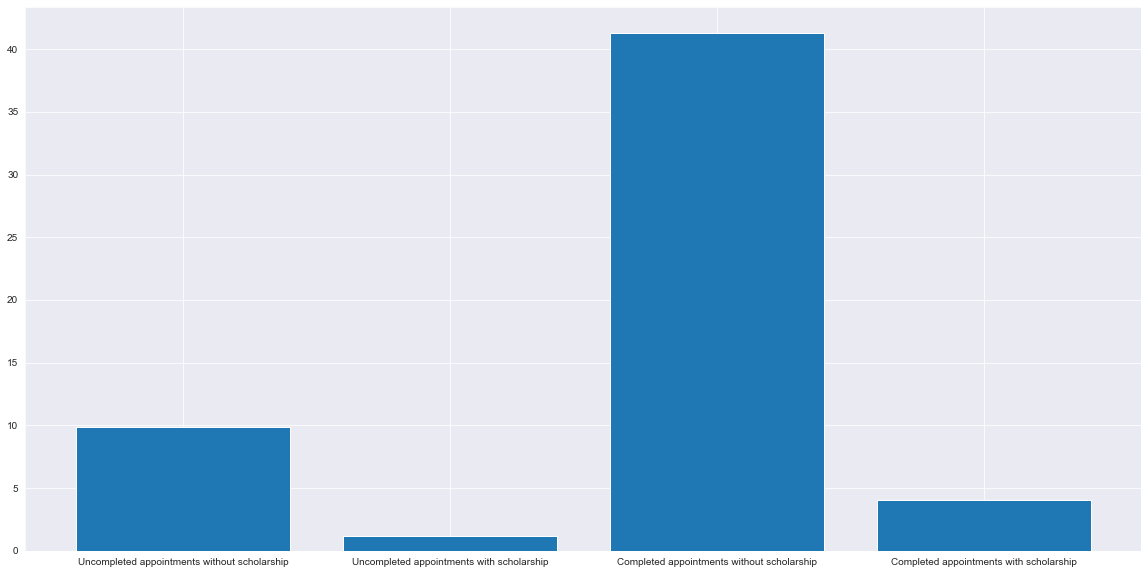

In [125]:
all_appointments = len(df.appointment_id.value_counts())

uncompleted_wo_scholarship = len(get_uncompleted_appointments(patients_without_scholarship)) / all_appointments * 100
uncompleted_w_scholarship = len(get_uncompleted_appointments(patients_with_scholarship)) / all_appointments * 100

completed_wo_scholarship = len(get_completed_appointments(patients_without_scholarship)) / all_appointments * 100
completed_w_scholarship = len(get_completed_appointments(patients_with_scholarship)) / all_appointments * 100

columns = ["Uncompleted appointments without scholarship","Uncompleted appointments with scholarship", "Completed appointments without scholarship","Completed appointments with scholarship"]
values = [uncompleted_wo_scholarship,uncompleted_w_scholarship,completed_wo_scholarship, completed_w_scholarship]

plt.suptitle = "Relationship of people with a scholarship compared to the amount of no-shows"
plt.ylabel = "Percentage of all appointments"
plt.xlabel = "Number of people"
plt.figure(figsize=(20,10))
plt.bar(columns,values);

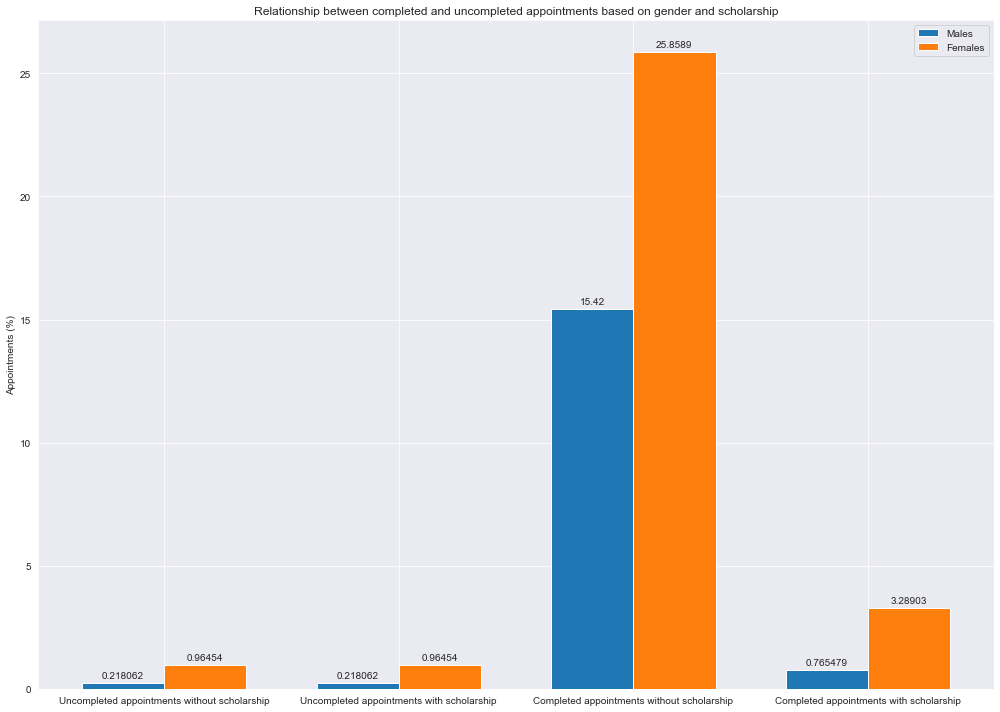

In [135]:
females_uws = len(get_uncompleted_appointments(females_with_scholarship)) / all_appointments * 100
females_uwos = len(get_uncompleted_appointments(females_without_scholarship)) / all_appointments * 100
females_cws = len(get_completed_appointments(females_with_scholarship)) / all_appointments * 100
females_cwos = len(get_completed_appointments(females_without_scholarship)) / all_appointments * 100

males_uws = len(get_uncompleted_appointments(males_with_scholarship)) / all_appointments * 100
males_uwos = len(get_uncompleted_appointments(males_without_scholarship)) / all_appointments * 100
males_cws = len(get_completed_appointments(males_with_scholarship)) / all_appointments * 100
males_cwos = len(get_completed_appointments(males_without_scholarship)) / all_appointments * 100

labels = ["Uncompleted appointments without scholarship", "Uncompleted appointments with scholarship", "Completed appointments without scholarship", "Completed appointments with scholarship"]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

males = [males_uws,males_uws,males_cwos,males_cws]
females = [females_uws,females_uws,females_cwos,females_cws]

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(14)

males_bar = ax.bar(x - width/2, males, width, label='Males')
females_bar = ax.bar(x + width/2, females, width, label='Females')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Appointments (%)')
ax.set_title('Relationship between completed and uncompleted appointments based on gender and scholarship')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(males_bar, padding=3)
ax.bar_label(females_bar, padding=3)

fig.tight_layout()

plt.show();